In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
from tensorflow.keras.preprocessing import image

In [3]:
import glob

In [4]:
import shutil

In [27]:
df_train = pd.read_csv('Datos\\Training_Set\\Training_Labels.csv')
df_train


,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1916,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,1917,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1917,1918,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,1919,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df_validation = pd.read_csv('Datos\\Evaluation_Set\\Validation_Labels.csv')
df_validation

#Dos de ellas no me sirven que serian ID y Disease Risk Se hara despues con estas
#df_validation = df_validation.drop(['ID', 'Disease_Risk'], axis=1)
#df_validation

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
636,637,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
637,638,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638,639,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_test = pd.read_csv('Datos\\Test_Set\\Testing_Labels.csv')
df_test
#Dos de ellas no me sirven que serian ID y Disease Risk Se hara despues con estas
#df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)
#df_test

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,636,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
636,637,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
637,638,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
638,639,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
#Dos de ellas no me sirven que serian ID y Disease Risk
df_train = df_train.drop(['ID', 'Disease_Risk'], axis=1)
df_train

,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1916,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def revisar_enfermedad(df):
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)    
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]
    
    return disease_name, zeroCount, oneCount

# Insert the image ID
def img_id(df,num):
    id_list = []
    for i in range(num):
        id_list.append(i+1)
    df.insert(0,'ID',id_list)

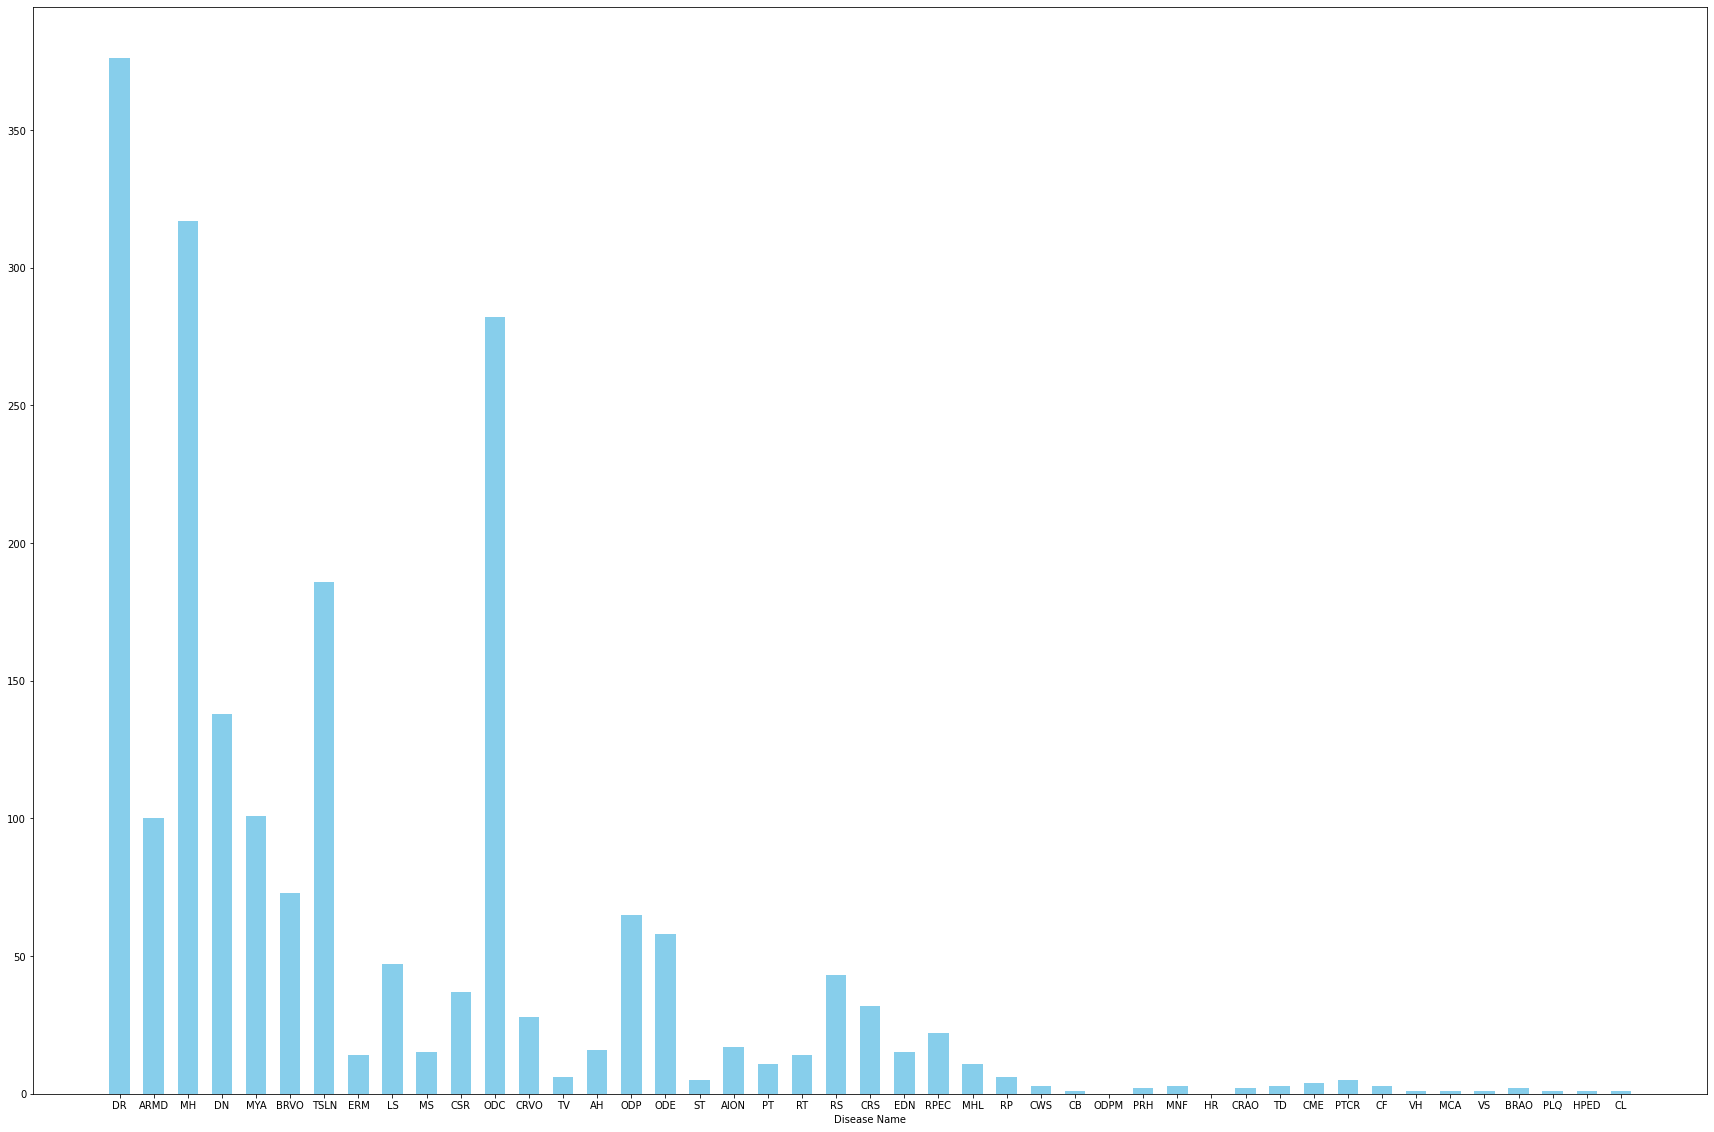

DR aparece: 376
ARMD aparece: 100
MH aparece: 317
DN aparece: 138
MYA aparece: 101
BRVO aparece: 73
TSLN aparece: 186
ERM aparece: 14
LS aparece: 47
MS aparece: 15
CSR aparece: 37
ODC aparece: 282
CRVO aparece: 28
TV aparece: 6
AH aparece: 16
ODP aparece: 65
ODE aparece: 58
ST aparece: 5
AION aparece: 17
PT aparece: 11
RT aparece: 14
RS aparece: 43
CRS aparece: 32
EDN aparece: 15
RPEC aparece: 22
MHL aparece: 11
RP aparece: 6
CWS aparece: 3
CB aparece: 1
ODPM aparece: 0
PRH aparece: 2
MNF aparece: 3
HR aparece: 0
CRAO aparece: 2
TD aparece: 3
CME aparece: 4
PTCR aparece: 5
CF aparece: 3
VH aparece: 1
MCA aparece: 1
VS aparece: 1
BRAO aparece: 2
PLQ aparece: 1
HPED aparece: 1
CL aparece: 1


In [33]:
disease_name, zeroCount, oneCount = revisar_enfermedad(df_train)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue'])
plt.xlabel('Disease Name')
plt.show()

dicRetino = {}
for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' aparece: '+ str(oneCount[i]))
    dicRetino[disease_name[i]] = oneCount[i]

Mostrarlas de forma ordenada en grafica
Notas:
Jugar con las cantidades de cada una de las diferentes utilizar la matriz de confusion y observar
guardar todos los tipos de formato y buscar un valor unico en tamaño para estandarizar.

Existen 47 clases diferentes donde tiene una ID y 46 enfermedades diferentes. 

Se piensa realizar una sumatoria de las diferentes clases para dar una idea de cuantas imagenes se tienen de cada categoria ademas de ver cuantas retinas son sanas y cuantas tienen una enfermedad.
De acuerdo con lo obtenido de esto se podra dar una idea de cuales enfermedades no se tienen en cuenta y asi. 


In [11]:
print(dicRetino)

for key in dicRetino:
    print(key, ' : ', dicRetino[key])

{'DR': 376, 'ARMD': 100, 'MH': 317, 'DN': 138, 'MYA': 101, 'BRVO': 73, 'TSLN': 186, 'ERM': 14, 'LS': 47, 'MS': 15, 'CSR': 37, 'ODC': 282, 'CRVO': 28, 'TV': 6, 'AH': 16, 'ODP': 65, 'ODE': 58, 'ST': 5, 'AION': 17, 'PT': 11, 'RT': 14, 'RS': 43, 'CRS': 32, 'EDN': 15, 'RPEC': 22, 'MHL': 11, 'RP': 6, 'CWS': 3, 'CB': 1, 'ODPM': 0, 'PRH': 2, 'MNF': 3, 'HR': 0, 'CRAO': 2, 'TD': 3, 'CME': 4, 'PTCR': 5, 'CF': 3, 'VH': 1, 'MCA': 1, 'VS': 1, 'BRAO': 2, 'PLQ': 1, 'HPED': 1, 'CL': 1}
DR  :  376
ARMD  :  100
MH  :  317
DN  :  138
MYA  :  101
BRVO  :  73
TSLN  :  186
ERM  :  14
LS  :  47
MS  :  15
CSR  :  37
ODC  :  282
CRVO  :  28
TV  :  6
AH  :  16
ODP  :  65
ODE  :  58
ST  :  5
AION  :  17
PT  :  11
RT  :  14
RS  :  43
CRS  :  32
EDN  :  15
RPEC  :  22
MHL  :  11
RP  :  6
CWS  :  3
CB  :  1
ODPM  :  0
PRH  :  2
MNF  :  3
HR  :  0
CRAO  :  2
TD  :  3
CME  :  4
PTCR  :  5
CF  :  3
VH  :  1
MCA  :  1
VS  :  1
BRAO  :  2
PLQ  :  1
HPED  :  1
CL  :  1


In [12]:
sorted(dicRetino, key=dicRetino.get, reverse=True)

['DR',
 'MH',
 'ODC',
 'TSLN',
 'DN',
 'MYA',
 'ARMD',
 'BRVO',
 'ODP',
 'ODE',
 'LS',
 'RS',
 'CSR',
 'CRS',
 'CRVO',
 'RPEC',
 'AION',
 'AH',
 'MS',
 'EDN',
 'ERM',
 'RT',
 'PT',
 'MHL',
 'TV',
 'RP',
 'ST',
 'PTCR',
 'CME',
 'CWS',
 'MNF',
 'TD',
 'CF',
 'PRH',
 'CRAO',
 'BRAO',
 'CB',
 'VH',
 'MCA',
 'VS',
 'PLQ',
 'HPED',
 'CL',
 'ODPM',
 'HR']

In [13]:
#AQUI ESTAS En esta seccion se mostro las caracteristicas de cada una de las imagenes. Primero se muestra la de training
import os
from PIL import Image 

folder_images = "Datos\\Training_Set\\Training"
dict_imagenes_train = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            dict_imagenes_train[path_image] = {'width': width, 'heigth': heigth}
print(dict_imagenes_train)

{'1.png': {'width': 2144, 'heigth': 1424}, '10.png': {'width': 2144, 'heigth': 1424}, '100.png': {'width': 2144, 'heigth': 1424}, '1000.png': {'width': 2144, 'heigth': 1424}, '1001.png': {'width': 2144, 'heigth': 1424}, '1002.png': {'width': 2144, 'heigth': 1424}, '1003.png': {'width': 2144, 'heigth': 1424}, '1004.png': {'width': 2144, 'heigth': 1424}, '1005.png': {'width': 2144, 'heigth': 1424}, '1006.png': {'width': 2144, 'heigth': 1424}, '1007.png': {'width': 2144, 'heigth': 1424}, '1008.png': {'width': 2144, 'heigth': 1424}, '1009.png': {'width': 2144, 'heigth': 1424}, '101.png': {'width': 2144, 'heigth': 1424}, '1010.png': {'width': 2144, 'heigth': 1424}, '1011.png': {'width': 2144, 'heigth': 1424}, '1012.png': {'width': 2144, 'heigth': 1424}, '1013.png': {'width': 2144, 'heigth': 1424}, '1014.png': {'width': 2144, 'heigth': 1424}, '1015.png': {'width': 2144, 'heigth': 1424}, '1016.png': {'width': 2144, 'heigth': 1424}, '1017.png': {'width': 2144, 'heigth': 1424}, '1018.png': {'wi

Se realiza la conversion a DataFrame y crear el plot de su altura y anchura

In [14]:
type(dict_imagenes_train)
df_train = pd.DataFrame(dict_imagenes_train)
df_train = df_train.T.reset_index(drop=True)
df_train

,width,heigth
0,2144,1424
1,2144,1424
2,2144,1424
3,2144,1424
4,2144,1424
...,...,...
1915,2144,1424
1916,2144,1424
1917,2144,1424
1918,2144,1424


In [15]:
df_train.groupby(df_train.columns.tolist(),as_index=False).size() # cuenta cuantos hay de cada uno. Pero se ve mejor en la tablita

,width,heigth,size
0,2048,1536,150
1,2144,1424,1493
2,4288,2848,277


Text(0.5, 1.0, 'Tamaño Imagenes Training')

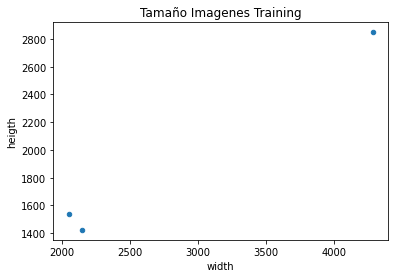

In [16]:
tam_train = df_train.groupby(['heigth', 'width']).size().reset_index().rename(columns={0:'count'})
tam_train.plot.scatter(x='width', y='heigth');
plt.title('Tamaño Imagenes Training')

Sigue el area de test

In [17]:
#En esta seccion se mostro las caracteristicas de cada una de las imagenes. Se muestra Test
folder_images = "Datos\\Test_Set\\Test"
dict_imagenes_test = dict()

for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            dict_imagenes_test[path_image] = {'width': width, 'heigth': heigth}
print(dict_imagenes_test)

{'1.png': {'width': 2144, 'heigth': 1424}, '10.png': {'width': 2144, 'heigth': 1424}, '100.png': {'width': 2144, 'heigth': 1424}, '101.png': {'width': 2144, 'heigth': 1424}, '102.png': {'width': 2144, 'heigth': 1424}, '103.png': {'width': 2144, 'heigth': 1424}, '104.png': {'width': 2144, 'heigth': 1424}, '105.png': {'width': 2144, 'heigth': 1424}, '106.png': {'width': 2144, 'heigth': 1424}, '107.png': {'width': 2144, 'heigth': 1424}, '108.png': {'width': 2144, 'heigth': 1424}, '109.png': {'width': 2144, 'heigth': 1424}, '11.png': {'width': 2144, 'heigth': 1424}, '110.png': {'width': 2144, 'heigth': 1424}, '111.png': {'width': 2144, 'heigth': 1424}, '112.png': {'width': 2144, 'heigth': 1424}, '113.png': {'width': 2144, 'heigth': 1424}, '114.png': {'width': 2144, 'heigth': 1424}, '115.png': {'width': 2144, 'heigth': 1424}, '116.png': {'width': 2144, 'heigth': 1424}, '117.png': {'width': 2144, 'heigth': 1424}, '118.png': {'width': 2144, 'heigth': 1424}, '119.png': {'width': 2144, 'heigth'

In [18]:
type(dict_imagenes_test)
df_test = pd.DataFrame(dict_imagenes_test)
df_test = df_test.T.reset_index(drop=True)
df_test

,width,heigth
0,2144,1424
1,2144,1424
2,2144,1424
3,2144,1424
4,2144,1424
...,...,...
635,2144,1424
636,2144,1424
637,2144,1424
638,2144,1424


In [19]:
df_test.groupby(df_test.columns.tolist(),as_index=False).size() # cuenta cuantos hay de cada uno. Pero se ve mejor en la tablita

,width,heigth,size
0,2048,1536,73
1,2144,1424,439
2,4288,2848,128


Text(0.5, 1.0, 'Tamaño Imagenes Test')

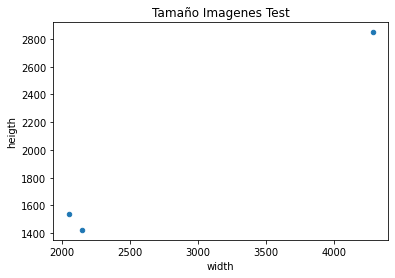

In [20]:
tam_test = df_test.groupby(['heigth', 'width']).size().reset_index().rename(columns={0:'count'})
tam_test.plot.scatter(x='width', y='heigth');
plt.title('Tamaño Imagenes Test')

Sigue el area de validation

In [21]:
##En esta seccion se mostro las caracteristicas de cada una de las imagenes. Se muestra la de Validation
folder_images = "Datos\\Evaluation_Set\\Validation"
dict_imagenes_val = dict()


for dirpath, _, filenames in os.walk(folder_images):
    for path_image in filenames:
        image = os.path.abspath(os.path.join(dirpath, path_image))
        with Image.open(image) as img:
            width, heigth = img.size
            dict_imagenes_val[path_image] = {'width': width, 'heigth': heigth}
print(dict_imagenes_val)

{'1.png': {'width': 2144, 'heigth': 1424}, '10.png': {'width': 2144, 'heigth': 1424}, '100.png': {'width': 2144, 'heigth': 1424}, '101.png': {'width': 2144, 'heigth': 1424}, '102.png': {'width': 2144, 'heigth': 1424}, '103.png': {'width': 2144, 'heigth': 1424}, '104.png': {'width': 2144, 'heigth': 1424}, '105.png': {'width': 2144, 'heigth': 1424}, '106.png': {'width': 2144, 'heigth': 1424}, '107.png': {'width': 2144, 'heigth': 1424}, '108.png': {'width': 2144, 'heigth': 1424}, '109.png': {'width': 2144, 'heigth': 1424}, '11.png': {'width': 2144, 'heigth': 1424}, '110.png': {'width': 2144, 'heigth': 1424}, '111.png': {'width': 2144, 'heigth': 1424}, '112.png': {'width': 2144, 'heigth': 1424}, '113.png': {'width': 2144, 'heigth': 1424}, '114.png': {'width': 2144, 'heigth': 1424}, '115.png': {'width': 2144, 'heigth': 1424}, '116.png': {'width': 2144, 'heigth': 1424}, '117.png': {'width': 2144, 'heigth': 1424}, '118.png': {'width': 2144, 'heigth': 1424}, '119.png': {'width': 2144, 'heigth'

In [22]:
type(dict_imagenes_val)
df_val = pd.DataFrame(dict_imagenes_val)
df_val = df_val.T.reset_index(drop=True)
df_val

,width,heigth
0,2144,1424
1,2144,1424
2,2144,1424
3,2144,1424
4,2144,1424
...,...,...
635,2144,1424
636,2144,1424
637,2144,1424
638,2144,1424


In [23]:
df_val.groupby(df_val.columns.tolist(),as_index=False).size() # cuenta cuantos hay de cada uno. Pero se ve mejor en la tablita

,width,heigth,size
0,2048,1536,53
1,2144,1424,495
2,4288,2848,92


Text(0.5, 1.0, 'Tamaño Imagenes Validation')

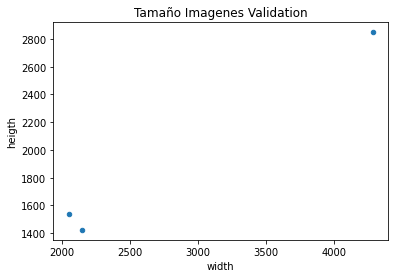

In [24]:
tam_val = df_val.groupby(['heigth', 'width']).size().reset_index().rename(columns={0:'count'})
tam_val.plot.scatter(x='width', y='heigth');
plt.title('Tamaño Imagenes Validation')

Se realizara el de las imagenes promedio

In [32]:
train_dir = 'Datos\\Training_Set\\Training' # image folder

In [34]:
normal_imgs = [fn for fn in os.listdir(f'{train_dir}') if fn.endswith('.png')]

In [36]:
select_norm = np.random.choice(normal_imgs, 3, replace = False)

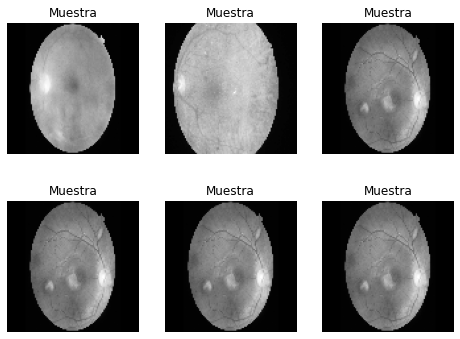

In [43]:
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/{select_norm[i]}'
        label = 'Muestra'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp, target_size = (100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

In [45]:
# making n X m matrix
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat


In [47]:
normal_images = img2np(f'{train_dir}/', normal_imgs)

In [48]:
normal_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [49]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

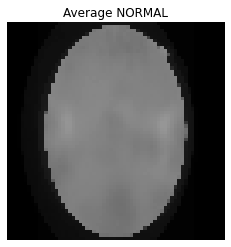

In [50]:
norm_mean = find_mean_img(normal_images, 'NORMAL')

In [64]:
source = train_dir
destination = "Datos\\Training_Set\\DR"
imagenes_dr = [1,2,3,5,18,19,20,26,34,36,37,38,39,42,43,44,49,50,59,61,62,64,70,71,80,85,86,97,98,101,102,104,105,106,111,112,119,120,122,125,128,129,130,131,134,143,144,166,170,191,195,196,197,202,214,215,219,228,229,231,232,233,234,241,242,246,252,253,263,264,267,268,277,280,284,285,287,294,305,306,308,318,337,346,347,350,367,379,385,390,391,392,394,395,402,403,426,427,440,441,460,463,465,468,469,473,478,479,486,487,495,496,497,523,527,534,538,539,540,541,556,557,560,561,583,584,585,586,590,591,595,596,613,614,615,616,624,625,633,658,659,695,696,705,706,710,711,739,759,760,779,781,823,827,828,829,858,888,911,912,925,934,938,948,949,950,967,976,995,1025,1026,1036,1037,1039,1040,1043,1048,1060,1061,1062,1065,1066,1069,1070,1079,1089,1090,1093,1097,1098,1100,1104,1105,1110,1117,1119,1127,1128,1130,1133,1141,1142,1146,1150,1154,1157,1158,1159,1160,1161,1162,1165,1166,1172,1175,1180,1181,1186,1187,1190,1195,1197,1198,1199,1201,1207,1208,1211,1212,1222,1223,1226,1227,1232,1240,1241,1247,1251,1252,1257,1258,1275,1276,1277,1296,1297,1308,1309,1313,1322,1323,1330,1331,1332,1333,1337,1340,1347,1348,1349,1356,1357,1358,1359,1362,1364,1365,1368,1373,1375,1377,1378,1379,1380,1383,1384,1386,1387,1393,1394,1395,1396,1398,1403,1406,1408,1409,1412,1413,1414,1415,1416,1417,1418,1420,1436,1437,1466,1467,1487,1488,1493,1496,1497,1498,1499,1502,1503,1504,1505,1512,1514,1515,1516,1518,1519,1522,1523,1530,1533,1534,1537,1538,1541,1542,1546,1548,1551,1561,1563,1569,1570,1582,1593,1594,1596,1597,1602,1603,1608,1609,1610,1612,1615,1616,1623,1624,1626,1627,1628,1629,1636,1637,1638,1639,1642,1643,1645,1646,1649,1650,1660,1661,1662,1665,1666,1667,1668,1669,1681,1682,1687,1693,1725,1726,1917]



In [65]:
type(imagenes_dr)

list

In [66]:
# This will target the PNG files

for i in imagenes_dr:
    for images in glob.iglob(os.path.join(source, f'{i}.png')):
        shutil.copy(images, destination)

In [67]:
normal_imgs_dr = [fn for fn in os.listdir(f'{destination}') if fn.endswith('.png')]
len(normal_imgs_dr)

In [70]:
normal_images_dr = img2np(f'{train_dir}/', normal_imgs_dr)

In [71]:
normal_images_dr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

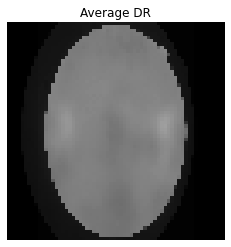

In [73]:
norm_mean_dr = find_mean_img(normal_images_dr, 'DR')

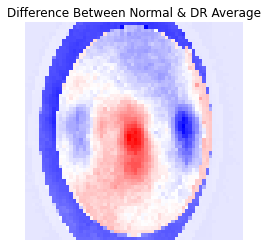

In [74]:
contrast_mean = norm_mean - norm_mean_dr
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Normal & DR Average')
plt.axis('off')
plt.show()

In [75]:
source = train_dir
destination = "Datos\\Training_Set\\Sano"
imagenes_sano = [10,16,17,21,28,68,81,83,90,91,92,93,94,115,116,117,118,126,138,148,153,154,159,160,167,175,179,206,209,218,230,238,239,248,255,256,257,258,266,270,271,274,292,293,313,314,320,325,336,339,344,374,375,378,406,410,414,420,421,430,431,435,442,443,449,452,454,458,462,466,470,482,489,498,529,530,531,536,537,553,569,578,579,582,593,594,598,601,605,617,641,642,649,651,666,680,684,690,692,693,701,708,715,728,730,735,743,757,758,769,793,794,795,797,798,801,802,803,805,812,813,815,822,833,834,839,840,850,852,859,863,868,872,883,885,889,893,895,896,898,899,900,901,904,905,908,910,928,931,936,940,942,944,947,956,965,969,974,997,999,1010,1014,1015,1018,1024,1032,1035,1041,1045,1046,1052,1063,1064,1071,1072,1077,1082,1085,1086,1101,1102,1109,1112,1113,1124,1134,1135,1137,1145,1147,1153,1176,1185,1188,1189,1193,1194,1209,1214,1224,1225,1231,1244,1245,1250,1255,1264,1265,1284,1295,1303,1311,1312,1314,1318,1319,1321,1374,1381,1382,1388,1392,1404,1410,1411,1419,1508,1510,1525,1526,1535,1543,1544,1553,1554,1555,1558,1562,1586,1587,1588,1601,1614,1644,1647,1657,1659,1663,1675,1684,1691,1696,1699,1701,1703,1704,1705,1706,1707,1709,1714,1715,1716,1717,1718,1719,1727,1728,1729,1730,1731,1732,1733,1734,1735,1736,1737,1738,1740,1742,1743,1744,1745,1746,1748,1751,1752,1754,1756,1757,1759,1760,1764,1765,1766,1767,1768,1771,1773,1775,1777,1780,1781,1782,1785,1786,1787,1788,1790,1791,1792,1794,1795,1796,1797,1800,1801,1802,1805,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1819,1820,1821,1822,1823,1824,1827,1828,1829,1830,1832,1833,1837,1838,1839,1840,1841,1844,1848,1849,1850,1852,1853,1855,1856,1858,1859,1860,1861,1862,1863,1864,1865,1868,1869,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1888,1889,1890,1893,1894,1895,1896,1897,1898,1899,1900,1901,1904,1905,1911,1912,1913,1918,1919,1920]

In [76]:
# This will target the PNG files

for i in imagenes_sano:
    for images in glob.iglob(os.path.join(source, f'{i}.png')):
        shutil.copy(images, destination)

In [77]:
normal_imgs_sano = [fn for fn in os.listdir(f'{destination}') if fn.endswith('.png')]
len(normal_imgs_dr)

376

In [78]:
normal_images_sano = img2np(f'{train_dir}/', normal_imgs_sano)

In [79]:
normal_images_sano

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

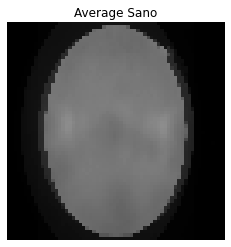

In [80]:
norm_mean_sano = find_mean_img(normal_images_sano, 'Sano')

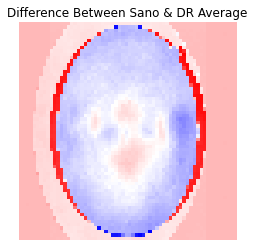

In [81]:
contrast_mean = norm_mean_sano - norm_mean_dr
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between Sano & DR Average')
plt.axis('off')
plt.show()

Continuacion entrenar el clasificador, red convolucional, buscar transfer learning. red preeentrenada => buscar mas informacion de ellas. 
Tratar de meter ya el algoritmo de clasificacion. 
que es red convolucionlar, como funcionar que son. entenderla. cada una de las capas. como funcionan cada una de ellas. 
